<div style="padding:10px; 
            color:black;
            margin:10px;
            font-size:170%;
            display:fill;
            border-radius:1px;
            border-style: solid;
            border-color:#f17d8e;
            background-color:#f6abb6;
            overflow:hidden;">
    <center>
        <a id='top'></a>
        <b>Table of Contents</b>
    </center>
    <br>
    <ul>
        <li>
            <a href="#1" style="color:black">1 - Imports</a>
        </li>
        <li>
            <a href="#2" style="color:black">2 - Data Analysis</a>
        </li>
        <li>
            <a href="#3" style="color:black">3 - Data Preprocessing</a>
        </li>
        <li>
            <a href="#4" style="color:black">4 - Model Evaluation</a>
            <ul>
                <li>
                    <a href="#4-1" style="color:black">4.1 - Logistic Regression</a>
                </li>
                <li>
                    <a href="#4-2" style="color:black">4.2 - DecisionTree</a>
                </li>
                <li>
                    <a href="#4-3" style="color:black">4.3 - KNearestNeighbors</a>
                </li>
                <li>
                    <a href="#4-4" style="color:black">4.4 - RandomForestClassifier</a>
                </li>
                <li>
                    <a href="#4-5" style="color:black">4.5 - XGBoost</a>
                </li>
                <li>
                    <a href="#4-6" style="color:black">4.6 - Naive Bayes</a>
                </li>
                <li>
                    <a href="#4-7" style="color:black">4.7 - Neural Network</a>
                </li>
            </ul>
        </li>
        <li>
            <a href="#5" style="color:black">5 - Trying all features</a>
        </li>
        <li>
            <a href="#6" style="color:black">6 - Evaluation</a>
        </li>
        <li>
            <a href="#7" style="color:black">7 - Conclusion</a>
        </li>
        <li>
            <a href="#8" style="color:black">8 - Thank You</a>
        </li>
    </ul>
</div>
<a id="1"></a>

<h1 style='background:#f6abb6;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: black;'>Imports</center></h1>

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xgboost as xgb
import plotly.express as px

from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score, precision_score, accuracy_score, recall_score, balanced_accuracy_score

import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Model

<a id="2"></a>
<h1 style='background:#f6abb6;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #000000;'>Data Analysis</center></h1>
    
# Data Analysis

In [2]:
df = pd.read_csv('/kaggle/input/breast-cancer-dataset/breast-cancer.csv')
                 
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df.describe().T.style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,count,mean,std,min,25%,50%,75%,max
id,569.000000,30371831.432337,125020585.612224,8670.000000,869218.000000,906024.000000,8813129.000000,911320502.000000
radius_mean,569.000000,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.110000
texture_mean,569.000000,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.280000
perimeter_mean,569.000000,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.500000
area_mean,569.000000,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.000000
smoothness_mean,569.000000,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.163400
compactness_mean,569.000000,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.345400
concavity_mean,569.000000,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.426800
concave points_mean,569.000000,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.201200
symmetry_mean,569.000000,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.304000


In [4]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [5]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [6]:
fig = px.histogram(data_frame=df, x='diagnosis', color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])
fig.update_layout(bargap=0.1)
fig.show()

### From these plots we conclude that: 

* **There is a significant class imbalance, with the number of malignant cases being considerably lower than the number of benign cases we need to consider alternative evaluation metrics, beyond accuracy, when developing classification models on this data.**

 

In [7]:
fig = px.histogram(data_frame=df,x=df.area_mean,color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])
fig.update_layout(bargap=0.1)
fig.show()

In [8]:
fig = px.histogram(data_frame=df,x='radius_mean',color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])
fig.update_layout(bargap=0.1)
fig.show()

In [9]:
fig = px.histogram(data_frame=df,x='perimeter_mean',color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])
fig.update_layout(bargap=0.1)
fig.show()

In [10]:
fig = px.histogram(data_frame=df,x='smoothness_mean',color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])
fig.update_layout(bargap=0.1)
fig.show()

In [11]:
fig = px.histogram(data_frame=df,x='texture_mean',color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])
fig.update_layout(bargap=0.1)
fig.show()

### From these plots we conclude that: 

* **There is a significant difference between the distributions of malignant and benign cases for parameters such as perimeter mean, area mean, and radius mean. Malignant cases appear to exhibit a wider range of values in these parameters than benign**

* **texture_mean and smoothness_mean exhibit less noticeable differences in the distribution of values between malignant and benign cases.**

 

In [12]:
px.scatter(data_frame=df,x='symmetry_worst',color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])


In [13]:
px.scatter(data_frame=df,x='concavity_worst',color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])


In [14]:
px.scatter(data_frame=df,x='fractal_dimension_worst',color='diagnosis',color_discrete_sequence=['#A865C9','#f6abb6'])


<a id="2"></a>
<h1 style='background:#f6abb6;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #000000;'>Data Preprocessing</center></h1>
    
# Data Preprocessing

In [15]:
df.drop('id', axis=1, inplace=True) 

In [16]:
df['diagnosis'] = (df['diagnosis'] == 'M').astype(int) #encode the label into 1/0

In [17]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


**Get highly correlated features with the target**

**As mentioned in this [notebook](https://www.kaggle.com/code/fareselmenshawii/introduction-to-feature-selection) Selecting highly correlated features gives better results**

In [18]:
corr = df.corr()

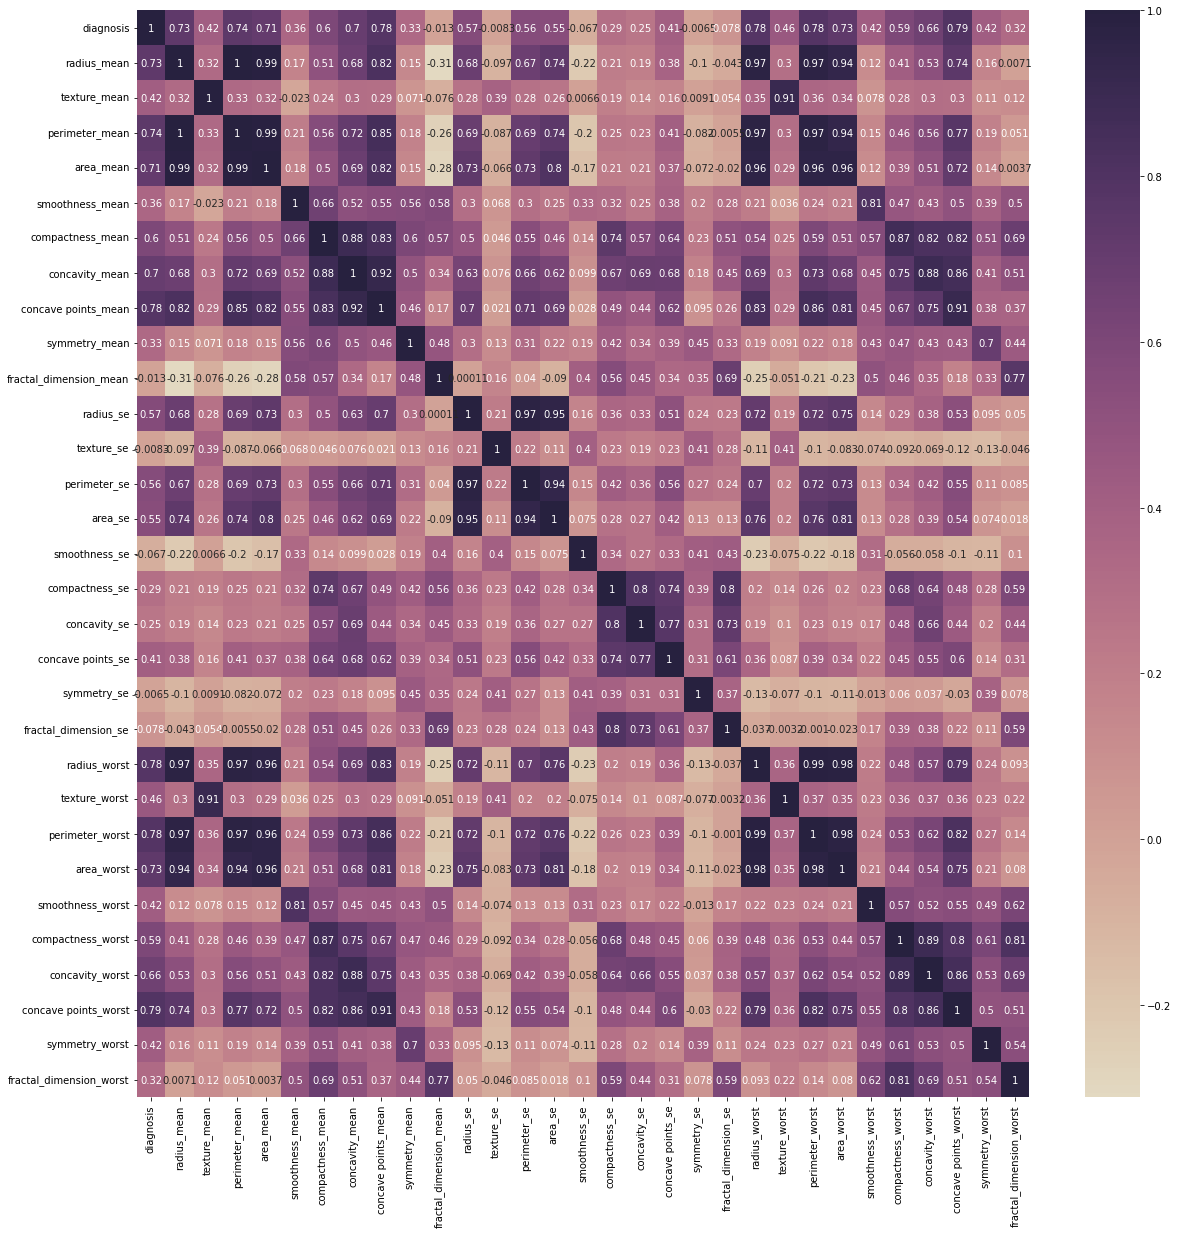

In [19]:
plt.figure(figsize=(20,20))
sns.heatmap(corr, cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True),annot=True)
plt.show()

# Get the absolute value of the correlation
cor_target = abs(corr["diagnosis"])

# Select highly correlated features (thresold = 0.2)
relevant_features = cor_target[cor_target>0.2]

# Collect the names of the features
names = [index for index, value in relevant_features.iteritems()]

# Drop the target variable from the results
names.remove('diagnosis')


**Define data and labels**

In [20]:
X = df[names]
y = df['diagnosis']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42) #split the  data into traing and validating

scaler = StandardScaler() #create an instance of standard scaler
scaler.fit(X_train) # fit it to the training data

scaler.transform(X_train) #transform training data
scaler.transform(X_test) #transform validation data

array([[-0.46649743, -0.13728933, -0.44421138, ..., -0.19435087,
         0.17275669,  0.20372995],
       [ 1.36536344,  0.49866473,  1.30551088, ...,  0.99177862,
        -0.561211  , -1.00838949],
       [ 0.38006578,  0.06921974,  0.40410139, ...,  0.57035018,
        -0.10783139, -0.20629287],
       ...,
       [-0.73547237, -0.99852603, -0.74138839, ..., -0.27741059,
        -0.3820785 , -0.32408328],
       [ 0.02898271,  2.0334026 ,  0.0274851 , ..., -0.49027026,
        -1.60905688, -0.33137507],
       [ 1.87216885,  2.80077153,  1.80354992, ...,  0.7925579 ,
        -0.05868885, -0.09467243]])

<a id="4"></a>
<h1 style='background:#f6abb6;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #000000;'>Model Evaluation</center></h1>
    
# Model Evaluation

**Now let's start Modeling**

**We'll start by defining a function to help us iterate faster**

In [22]:
def train_evaluate_model(model, X_train, y_train, X_test,y_test):
    '''
    Keyword arguments:
    X -- Training data
    y -- Traing labels

    returns a dataframe for evaluating metrics
    '''
    
    model.fit(X_train, y_train)  #fit the model instance 


    predictions = model.predict(X_test) # calculate predictions

    #compute metrics for evaluation
    accuracy = accuracy_score(y_test, predictions)
    f1 = f1_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    balanced_accuracy = balanced_accuracy_score(y_test, predictions)

    #create a dataframe to visualize the results
    eval_df = pd.DataFrame([[accuracy, f1, precision, recall, balanced_accuracy]], columns=['accuracy', 'f1_score', 'precision', 'recall', 'balanced_accuracy'])
    return eval_df

<a name="4-1"></a>
## Logistic Regression


In [23]:
lg = LogisticRegression()

results = train_evaluate_model(lg, X_train, y_train, X_test, y_test)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [24]:
results.index = ['LogisticRegression']

In [25]:
results.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy
LogisticRegression,0.964912,0.952381,0.975610,0.930233,0.958074


<a name="4-2"></a>
## Decision Tree 

In [26]:
decision_tree = DecisionTreeClassifier()
decision_tree_results = train_evaluate_model(decision_tree,X_train, y_train, X_test, y_test)

decision_tree_results.index = ['DecisionTree']

results = results.append(decision_tree_results)


In [27]:
results.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy
LogisticRegression,0.964912,0.952381,0.975610,0.930233,0.958074
DecisionTree,0.912281,0.886364,0.866667,0.906977,0.911235


<a name="4-3"></a>
## KNearestNeighbors

In [28]:
KNN = KNeighborsClassifier(n_neighbors=12)

In [29]:
knn = train_evaluate_model(KNN, X_train, y_train, X_test, y_test)
knn.index =['KNearsNeighbors']
results = results.append(knn)

In [30]:
results.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy
KNearsNeighbors,0.973684,0.963855,1.000000,0.930233,0.965116
LogisticRegression,0.964912,0.952381,0.975610,0.930233,0.958074
DecisionTree,0.912281,0.886364,0.866667,0.906977,0.911235


<a name="4-4"></a>
## RandomForestClassifer

In [31]:
rfc = RandomForestClassifier()

In [32]:
rfc_result = train_evaluate_model(rfc, X_train, y_train, X_test, y_test)
rfc_result.index = ['RandomForest']

results = results.append(rfc_result)

In [33]:
results.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy
KNearsNeighbors,0.973684,0.963855,1.000000,0.930233,0.965116
LogisticRegression,0.964912,0.952381,0.975610,0.930233,0.958074
RandomForest,0.956140,0.941176,0.952381,0.930233,0.951032
DecisionTree,0.912281,0.886364,0.866667,0.906977,0.911235


<a name="4-5"></a>
## XGBoost

In [34]:
xgboost = xgb.XGBClassifier()
xgboost_result = train_evaluate_model(xgboost, X_train, y_train, X_test, y_test)
xgboost_result.index = ['XGBoost']

results = results.append(xgboost_result)

In [35]:
results.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy
KNearsNeighbors,0.973684,0.963855,1.000000,0.930233,0.965116
LogisticRegression,0.964912,0.952381,0.975610,0.930233,0.958074
XGBoost,0.964912,0.952381,0.975610,0.930233,0.958074
RandomForest,0.956140,0.941176,0.952381,0.930233,0.951032
DecisionTree,0.912281,0.886364,0.866667,0.906977,0.911235


<a name="4-6"></a>
## Naive Bayes

In [36]:
Naive_Bayes = GaussianNB()
Naive_Bayes_result = train_evaluate_model(Naive_Bayes, X_train, y_train, X_test, y_test)
Naive_Bayes_result.index = ['NaiveBayes']

results = results.append(Naive_Bayes_result)

In [37]:
results.head(6).sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy
KNearsNeighbors,0.973684,0.963855,1.000000,0.930233,0.965116
NaiveBayes,0.973684,0.963855,1.000000,0.930233,0.965116
LogisticRegression,0.964912,0.952381,0.975610,0.930233,0.958074
XGBoost,0.964912,0.952381,0.975610,0.930233,0.958074
RandomForest,0.956140,0.941176,0.952381,0.930233,0.951032
DecisionTree,0.912281,0.886364,0.866667,0.906977,0.911235


<a name="4-7"></a>
## Neural Network

In [38]:
initializer = tf.keras.initializers.RandomNormal(seed=0)
def scheduler(epoch, lr):
    
    if epoch < 50:
        return lr
    else:
        return lr * tf.math.exp(-0.1)
    
callback = tf.keras.callbacks.LearningRateScheduler(scheduler) # set the callback to our scheduler function

inputs = Input(shape=X.shape[-1])
x= Dense(16,activation='relu',kernel_initializer=tf.keras.initializers.RandomNormal())(inputs)
x = Dropout(0.4)(x)
x= Dense(16,activation='relu',kernel_initializer=tf.keras.initializers.RandomNormal())(inputs)
x = Dropout(0.4)(x)
x = Dense(25,activation='relu',kernel_initializer=tf.keras.initializers.RandomNormal())(x)
x = Dense(1, activation='sigmoid',kernel_initializer=tf.keras.initializers.RandomNormal())(x)
model = Model(inputs=inputs, outputs=x)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train,epochs=140)
predictions = model.predict(X_test)



Epoch 1/140
15/15 [==============================] - 1s 2ms/step - loss: 0.7338 - accuracy: 0.4703
Epoch 2/140
15/15 [==============================] - 0s 2ms/step - loss: 0.6544 - accuracy: 0.6374
Epoch 3/140
15/15 [==============================] - 0s 2ms/step - loss: 0.6115 - accuracy: 0.6176
Epoch 4/140
15/15 [==============================] - 0s 2ms/step - loss: 0.5782 - accuracy: 0.7890
Epoch 5/140
15/15 [==============================] - 0s 2ms/step - loss: 0.5321 - accuracy: 0.7758
Epoch 6/140
15/15 [==============================] - 0s 2ms/step - loss: 0.5031 - accuracy: 0.8110
Epoch 7/140
15/15 [==============================] - 0s 2ms/step - loss: 0.4792 - accuracy: 0.8242
Epoch 8/140
15/15 [==============================] - 0s 2ms/step - loss: 0.4249 - accuracy: 0.8505
Epoch 9/140
15/15 [==============================] - 0s 2ms/step - loss: 0.4242 - accuracy: 0.8549
Epoch 10/140
15/15 [==============================] - 0s 2ms/step - loss: 0.3934 - accuracy: 0.8681
Epoch 11/

In [39]:
# Generate binary predictions for the test data using the trained neural network model
predictions = model.predict(X_test)
# convert predicted probabilities to binary predictions Note that a threshold of 0.4 was used as recall is more important for medical diagnosis
predictions = (predictions > 0.4) 

# Calculate evaluation metrics using the binary predictions and true labels for the test data
accuracy = accuracy_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
balanced_accuracy = balanced_accuracy_score(y_test, predictions)

# Create a pandas dataframe containing the evaluation metric values as a single row
nn_df = pd.DataFrame([[accuracy, f1, precision, recall, balanced_accuracy]], 
                     columns=['accuracy', 'f1_score', 'precision', 'recall', 'balanced_accuracy'])


In [40]:
nn_df.index = ['NeuralNetwork']
results = results.append(nn_df)

In [41]:
results.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy
KNearsNeighbors,0.973684,0.963855,1.000000,0.930233,0.965116
NaiveBayes,0.973684,0.963855,1.000000,0.930233,0.965116
LogisticRegression,0.964912,0.952381,0.975610,0.930233,0.958074
XGBoost,0.964912,0.952381,0.975610,0.930233,0.958074
RandomForest,0.956140,0.941176,0.952381,0.930233,0.951032
NeuralNetwork,0.956140,0.938272,1.000000,0.883721,0.941860
DecisionTree,0.912281,0.886364,0.866667,0.906977,0.911235


<a id="5"></a>
<h1 style='background:#f6abb6;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #000000;'>Trying all Features</center></h1>
    
# Trying all Features

**As a means of verifying the validity of our approach, we will try utilizing all available features in our analysis.**

In [42]:
X_all_features = df.drop('diagnosis',axis=1)
X_train_all_features, X_test_all_features, y_train, y_test = train_test_split(X_all_features, y, test_size = 0.2, random_state=42) #split the  data into traing and validating

In [43]:
LogisticRegression_all_features = train_evaluate_model(lg, X_train_all_features, y_train, X_test_all_features, y_test)

LogisticRegression_all_features.index = ['LogisticRegression_all_features']
results = results.append(LogisticRegression_all_features)

DecisionTree_all_features = train_evaluate_model(decision_tree, X_train_all_features, y_train, X_test_all_features, y_test)
DecisionTree_all_features.index = ['DecisionTree_all_features']
results = results.append(DecisionTree_all_features)


KNearsNeighbors_all_features =  train_evaluate_model(KNN, X_train_all_features, y_train, X_test_all_features, y_test)

KNearsNeighbors_all_features.index = ['KNearsNeighbors_all_features']
results = results.append(KNearsNeighbors_all_features)

RandomForest_all_features = train_evaluate_model(rfc,X_train_all_features, y_train, X_test_all_features, y_test)

RandomForest_all_features.index = ['RandomForest_all_features']
results = results.append(RandomForest_all_features)


XGBoost_all_features = train_evaluate_model(xgboost,X_train_all_features, y_train, X_test_all_features, y_test)

XGBoost_all_features.index = ['XGBoost_all_features']
results = results.append(XGBoost_all_features)


Naive_Bayes_all_features = train_evaluate_model(Naive_Bayes,X_train_all_features, y_train, X_test_all_features, y_test)
Naive_Bayes_all_features.index = ['NaiveBayes_all_features']

results = results.append(Naive_Bayes_all_features)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [44]:
results.sort_values(by='f1_score',ascending=False).style.background_gradient(cmap = sns.color_palette("ch:s=-.2,r=.6", as_cmap=True))

,accuracy,f1_score,precision,recall,balanced_accuracy
KNearsNeighbors,0.973684,0.963855,1.000000,0.930233,0.965116
NaiveBayes,0.973684,0.963855,1.000000,0.930233,0.965116
KNearsNeighbors_all_features,0.973684,0.963855,1.000000,0.930233,0.965116
NaiveBayes_all_features,0.973684,0.963855,1.000000,0.930233,0.965116
LogisticRegression,0.964912,0.952381,0.975610,0.930233,0.958074
XGBoost,0.964912,0.952381,0.975610,0.930233,0.958074
RandomForest_all_features,0.964912,0.952381,0.975610,0.930233,0.958074
RandomForest,0.956140,0.941176,0.952381,0.930233,0.951032
XGBoost_all_features,0.956140,0.941176,0.952381,0.930233,0.951032
LogisticRegression_all_features,0.956140,0.939759,0.975000,0.906977,0.946446


### Adding all Features gave us worse results for most algorithms and made training slower

<a id="6"></a>
<h1 style='background:#f6abb6;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #000000;'>Evaluation</center></h1>

# Evaluation

In [45]:
models = results.T.columns.values
models= models[0:7]

In [46]:
models

array(['LogisticRegression', 'DecisionTree', 'KNearsNeighbors',
       'RandomForest', 'XGBoost', 'NaiveBayes', 'NeuralNetwork'],
      dtype=object)

In [47]:
fig = px.bar(x=results.iloc[:7,0].values, y =models,orientation='h',color=results['accuracy'].iloc[:7],color_continuous_scale='tealrose',
            template="seaborn")

fig.update_layout(width=800, height=600,
                 xaxis=dict(title='Accuracy'),
                 yaxis=dict(title="Models"))

fig.show()

In [48]:
fig = px.bar(x=results.iloc[:7,1].values, y =models,orientation='h',color=results['accuracy'].iloc[:7],color_continuous_scale='tealrose',
            template="seaborn")

fig.update_layout(width=800, height=600,
                 xaxis=dict(title='F1_Score'),
                 yaxis=dict(title="Models"))

fig.show()

In [49]:
fig = px.bar(x=results.iloc[:7,2].values, y =models,orientation='h',color=results['precision'].iloc[:7],color_continuous_scale='tealrose',
            template="seaborn")

fig.update_layout(width=800, height=600,
                 xaxis=dict(title='Precision'),
                 yaxis=dict(title="Models"))

fig.show()

In [50]:
fig = px.bar(x=results.iloc[:7,3].values, y =models,orientation='h',color=results['recall'].iloc[:7],color_continuous_scale='tealrose',
            template="seaborn")

fig.update_layout(width=800, height=600,
                 xaxis=dict(title='Recall'),
                 yaxis=dict(title="Models"))

fig.show()

In [51]:
fig = px.bar(x=results.iloc[:7,4].values, y =models,orientation='h',color=results['balanced_accuracy'].iloc[:7],color_continuous_scale='tealrose',
            template="seaborn")

fig.update_layout(width=800, height=600,
                 xaxis=dict(title='Balanced Accuracy'),
                 yaxis=dict(title="Models"))

fig.show()

<a id="7"></a>
<h1 style='background:#f6abb6;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #000000;'>Conclusion</center></h1>
    
    
# Conclusion
**The Neural Network algorithm outperforms other algorithms in terms of recall and balanced accuracy.**

**Naive Bayes and K-Nearest Neighbors (KNN) algorithms perform similarly and achieve the highest precision scores.** 

**Decision Tree is the only algorithm that performs better without feature selection.**

**Note that results may vary slightly between notebook runs because of random intialization**

<a id="8"></a>
<h1 style='background:#f6abb6;border:0; color:black;
    box-shadow: 10px 10px 5px 0px rgba(0,0,0,0.75);
    transform: rotateX(10deg);
    '><center style='color: #000000;'>Thank You</center></h1>
    
# Thank You


**Thank you  for going through  this notebook**

**For more in-depth details about these algorithms please check my from scratch series of notebooks**

**If you have any feedback please let me know**

